In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(123)
Data = pd.read_csv("insurance.csv")
Data.sample(5)

,age,sex,bmi,children,smoker,region,charges
650,49,female,42.680,2,no,southeast,9800.88820
319,32,male,37.335,1,no,northeast,4667.60765
314,27,female,31.400,0,yes,southwest,34838.87300
150,35,male,24.130,1,no,northwest,5125.21570
336,60,male,25.740,0,no,southeast,12142.57860


In [2]:
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
# Exploratory Data Analysis

In [4]:
from matplotlib.gridspec import GridSpec

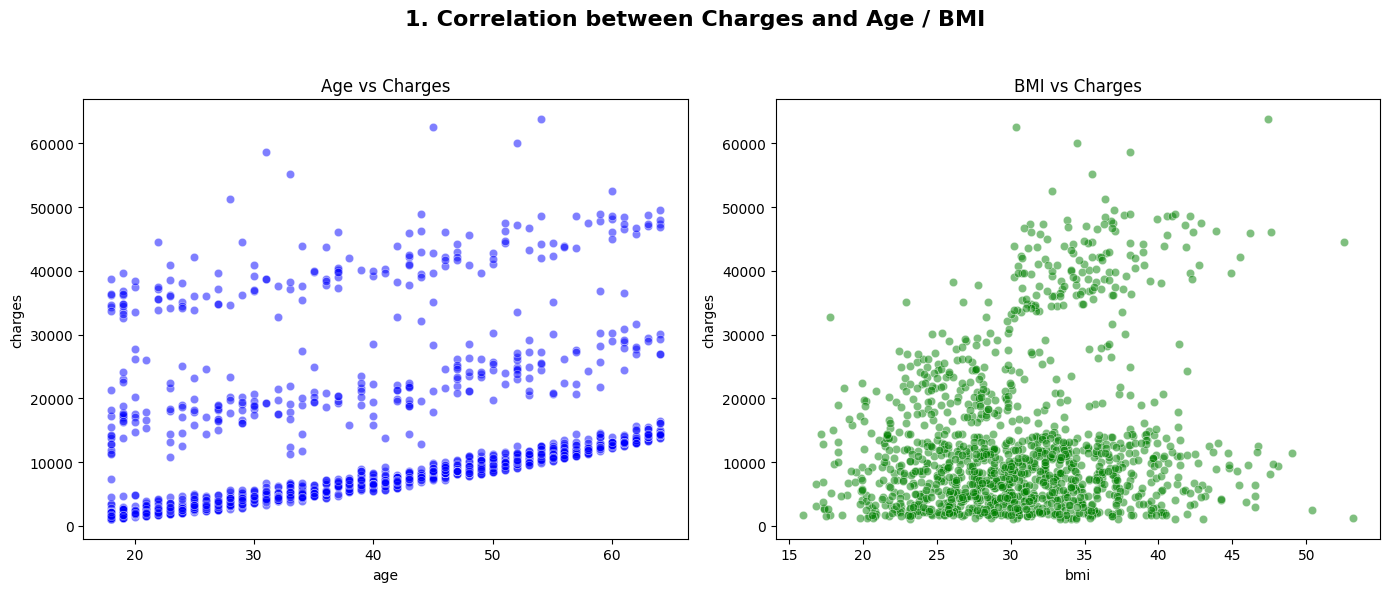

In [6]:
# Scatter plots for age vs charges and bmi vs charges side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Age vs Charges
sns.scatterplot(x="age", y="charges", data=Data, color="blue", alpha=0.5, ax=ax1)
ax1.set_title("Age vs Charges")

# Plot for BMI vs Charges
sns.scatterplot(x="bmi", y="charges", data=Data, color="green", alpha=0.5, ax=ax2)
ax2.set_title("BMI vs Charges")

# Adding a common title for both plots
plt.suptitle("1. Correlation between Charges and Age / BMI", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


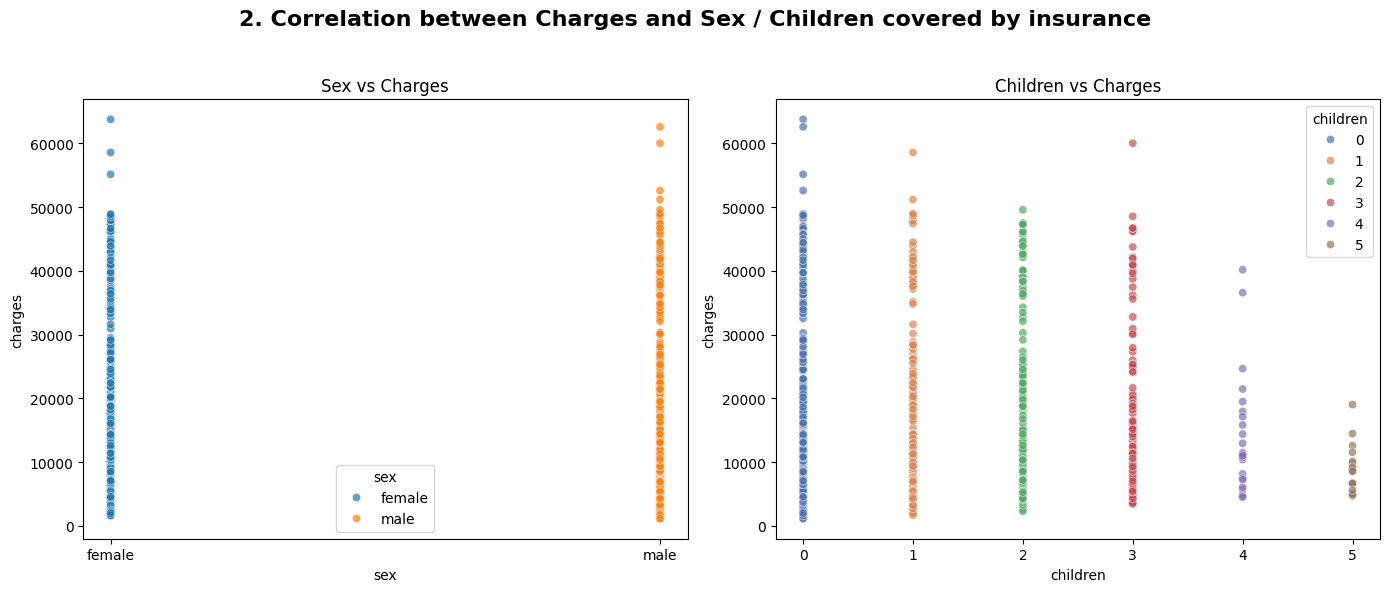

In [7]:
# Scatter plots for sex vs charges and children vs charges side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Sex vs Charges
sns.scatterplot(x="sex", y="charges", data=Data, hue="sex", alpha=0.7, ax=ax1)
ax1.set_title("Sex vs Charges")

# Plot for Children vs Charges
sns.scatterplot(x="children", y="charges", data=Data, hue="children", palette="deep", alpha=0.7, ax=ax2)
ax2.set_title("Children vs Charges")

# Adding a common title for both plots
plt.suptitle("2. Correlation between Charges and Sex / Children covered by insurance", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


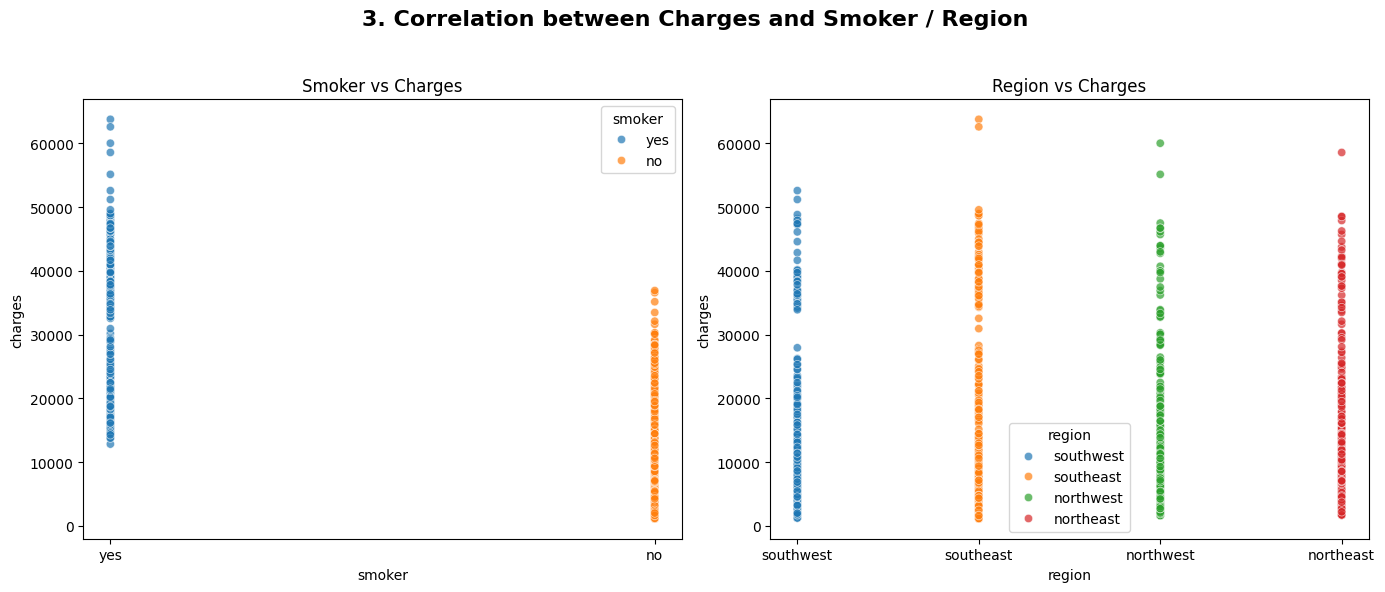

In [8]:
# Scatter plots for smoker vs charges and region vs charges side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Smoker vs Charges
sns.scatterplot(x="smoker", y="charges", data=Data, hue="smoker", alpha=0.7, ax=ax1)
ax1.set_title("Smoker vs Charges")

# Plot for Region vs Charges
sns.scatterplot(x="region", y="charges", data=Data, hue="region", alpha=0.7, ax=ax2)
ax2.set_title("Region vs Charges")

# Adding a common title for both plots
plt.suptitle("3. Correlation between Charges and Smoker / Region", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [10]:
# Plot 1: As Age and BMI go up Charges for health insurance also trends up.

# Plot 2: No obvious connection between Charges and Age. Charges for insurance with 4-5 chilren covered seems to go down (doesn’t make sense, does it?)

# Plot 3: Charges for Smokers are higher for non-smokers (no surprise here). No obvious connection between Charges and Region.

In [11]:
# Linear Regression Model
# Preparation and splitting the data

In [12]:
from sklearn.model_selection import train_test_split

# Assuming Data is already loaded as a pandas DataFrame
n_train = round(0.8 * len(Data))
train_indices = np.random.choice(Data.index, n_train, replace=False)
Data_train = Data.loc[train_indices]
Data_test = Data.drop(train_indices)

In [13]:
# Train and Test the Model

In [14]:
from sklearn.linear_model import LinearRegression

# Preparing the features and the target variable
formula_0_features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
X_train = pd.get_dummies(Data_train[formula_0_features], drop_first=True)
y_train = Data_train['charges']

# Creating the linear regression model and fitting it
model_0 = LinearRegression()
model_0.fit(X_train, y_train)

# Displaying the coefficients and intercept
print(model_0.coef_)
print(model_0.intercept_)


[ 2.60933301e+02  3.47438320e+02  5.58815110e+02 -1.96053877e+01
  2.37328836e+04  9.35628680e+01 -7.71057907e+02 -6.81779516e+02]
-12731.05089985727


In [15]:
# Saving R-squared, Predicting, and Calculating RMSE

In [16]:
from sklearn.metrics import mean_squared_error

# Predicting the test set
X_test = pd.get_dummies(Data_test[formula_0_features], drop_first=True)
y_test = Data_test['charges']
prediction_0 = model_0.predict(X_test)

# Calculating the residuals and RMSE
residuals_0 = y_test - prediction_0
rmse_0 = np.sqrt(mean_squared_error(y_test, prediction_0))

# Calculating R-squared
r_sq_0 = model_0.score(X_test, y_test)

print(f'R-squared: {r_sq_0}')
print(f'RMSE: {rmse_0}')


R-squared: 0.7301683824188996
RMSE: 6094.601346766094


In [17]:
# Train and Test New Model

In [18]:
# Defining a new formula without the 'sex' variable
formula_1_features = ['age', 'bmi', 'children', 'smoker', 'region']

X_train_new = pd.get_dummies(Data_train[formula_1_features], drop_first=True)
model_1 = LinearRegression()
model_1.fit(X_train_new, y_train)


LinearRegression()

In [19]:
# Saving R-squared and Calculating RMSE for the New Model

In [20]:
X_test_new = pd.get_dummies(Data_test[formula_1_features], drop_first=True)
prediction_1 = model_1.predict(X_test_new)

# Calculating residuals and RMSE for the new model
residuals_1 = y_test - prediction_1
rmse_1 = np.sqrt(mean_squared_error(y_test, prediction_1))

# R-squared for the new model
r_sq_1 = model_1.score(X_test_new, y_test)

print(f'R-squared (New Model): {r_sq_1}')
print(f'RMSE (New Model): {rmse_1}')


R-squared (New Model): 0.7301290992535245
RMSE (New Model): 6095.044968832374


In [21]:
# Compare Models

In [22]:
print(f'R-squared for first model: {round(r_sq_0, 4)}')
print(f'R-squared for new model: {round(r_sq_1, 4)}')
print(f'RMSE for first model: {round(rmse_0, 2)}')
print(f'RMSE for new model: {round(rmse_1, 2)}')


R-squared for first model: 0.7302
R-squared for new model: 0.7301
RMSE for first model: 6094.6
RMSE for new model: 6095.04


In [23]:
# Visualize Model Performance

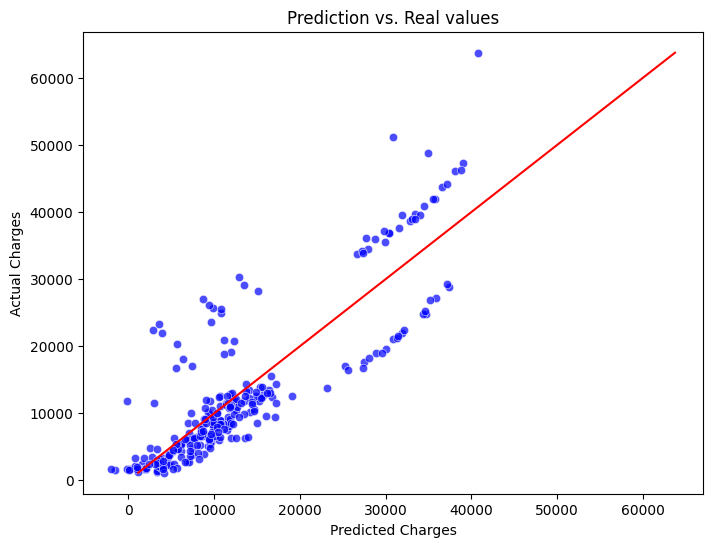

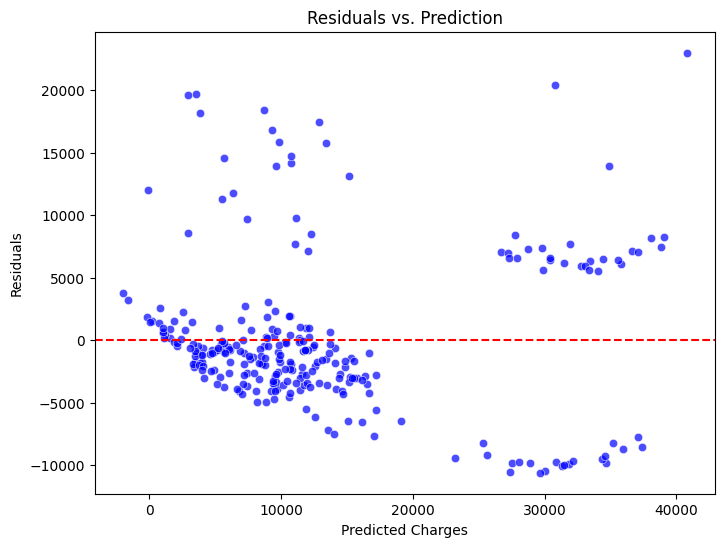

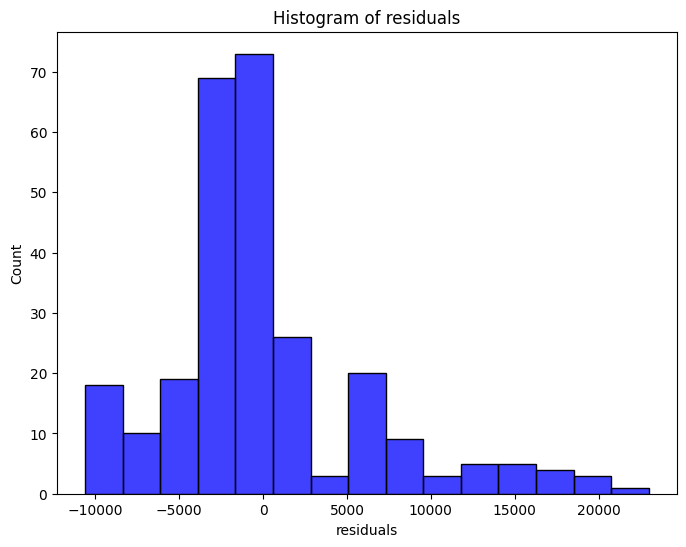

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding predictions to the test set
Data_test['prediction'] = prediction_1

# Scatter plot: Prediction vs. Real values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Data_test['prediction'], y=Data_test['charges'], color='blue', alpha=0.7)
plt.plot([Data_test['charges'].min(), Data_test['charges'].max()],
         [Data_test['charges'].min(), Data_test['charges'].max()], color='red')
plt.title("Prediction vs. Real values")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")
plt.show()

# Residuals vs. Prediction
Data_test['residuals'] = Data_test['charges'] - Data_test['prediction']
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Data_test['prediction'], y=Data_test['residuals'], color='blue', alpha=0.7)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs. Prediction")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(Data_test['residuals'], bins=15, kde=False, color='blue')
plt.title("Histogram of residuals")
plt.show()


In [26]:
# Predict Charges for Bob, Lisa, and John

In [29]:
# Creating a template DataFrame with all columns used in training
features_template = pd.get_dummies(Data_train[formula_1_features], drop_first=True).columns

# Function to process new data (Bob, Lisa, John) and align it with training data
def process_new_data(person_data, feature_columns):
    person_dummies = pd.get_dummies(person_data, drop_first=True)
    # Reindex the columns of the new data to match the feature columns from training
    person_dummies = person_dummies.reindex(columns=feature_columns, fill_value=0)
    return person_dummies

# Process each person's data
Bob_processed = process_new_data(Bob, features_template)
Lisa_processed = process_new_data(Lisa, features_template)
John_processed = process_new_data(John, features_template)

# Predicting charges for Bob, Lisa, and John
Bob_prediction = model_1.predict(Bob_processed)
Lisa_prediction = model_1.predict(Lisa_processed)
John_prediction = model_1.predict(John_processed)

# Print predictions
print(f"Health care charges for Bob: {round(Bob_prediction[0], 2)}")
print(f"Health care charges for Lisa: {round(Lisa_prediction[0], 2)}")
print(f"Health care charges for John: {round(John_prediction[0], 2)}")


Health care charges for Bob: 1910.37
Health care charges for Lisa: 16183.36
Health care charges for John: 5926.97
